<a href="https://colab.research.google.com/github/jhguay/base_ouverte/blob/main/MataneLabo1_avecComparaisonRegressionv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des bibliothèques et de la base de données

In [28]:
# Importation des bibliothèques Python
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import random
from sklearn.preprocessing import StandardScaler

# Lecture des données
loi_kleiber_data = pd.read_csv("https://github.com/ClaudeCoulombe/VIARENA/blob/master/DATA/LoiDeKleiber.csv?raw=True")
print(loi_kleiber_data)
print("Données lues")

loi_kleiber_data.info()
loi_kleiber_data.sample(n=5,random_state=42)
loi_kleiber_data['Masse'].max()


                 NomCommun                    Espece    Masse  Metabolisme  \
0                  Echidna    Tachiglossus aculeatus    2.500        302.0   
1      Long-beaked echidna         Zaglossus bruijni   10.300        594.0   
2                 Platypus  Ornithorhynchus anatinus    1.300        229.0   
3                  Opossum  Lutreolina crassicaudata    0.812        196.0   
4   South American opossum     Didelphis marsupialis    1.330        299.0   
..                     ...                       ...      ...          ...   
90           Rhesus monkey            Macaca mulatta    5.000        960.0   
91               Orangutan           Pongo pygma eus  150.000      15500.0   
92                 Gorilla           Gorilla gorilla  250.000      21000.0   
93                  Gibbon             Hylobater lar    8.000       1510.0   
94                   # Man              Homo sapiens   65.000       7560.0   

    DureeDeVie  
0         14.0  
1         20.0  
2          9

3000.0

# Traitement selon la méthode classique de la régression

In [20]:
import statsmodels.api as sm
from patsy import dmatrices
y,x=dmatrices('Metabolisme ~ Masse', data=loi_kleiber_data,return_type='dataframe')
mod=sm.OLS(y,x)
res=mod.fit()
print(res.summary())

#Application de l'équation de régresion
print("--------------------------------------------------------------------------------------------------------------")
masse=65
predictionMetabolisme=1203.2019+(57.0268*masse)
print(predictionMetabolisme)

                            OLS Regression Results                            
Dep. Variable:            Metabolisme   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4302.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           1.15e-79
Time:                        15:16:20   Log-Likelihood:                -887.05
No. Observations:                  95   AIC:                             1778.
Df Residuals:                      93   BIC:                             1783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1203.2019    291.270      4.131      0.0

# Traitement selon la méthode propre à l'intelligence artificielle

In [ ]:
# Définir un germe aléatoire
GERME_ALEATOIRE=11
os.environ['PYTHONHASHSEED'] = str(GERME_ALEATOIRE)
random.seed(GERME_ALEATOIRE)
np.random.seed(GERME_ALEATOIRE)
tf.random.set_seed(GERME_ALEATOIRE)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
print("Germe aléatoire fixé")

#On isole les deux variables et on les normalise

attribut_predictif = loi_kleiber_data['Masse'].values.reshape(-1, 1)
normalisateur_attribut_predictif = StandardScaler()
normalisateur_attribut_predictif.fit(attribut_predictif)
attribut_predictif = normalisateur_attribut_predictif.transform(attribut_predictif)

attribut_cible = loi_kleiber_data['Metabolisme'].values.reshape(-1, 1)
normalisateur_attribut_cible = StandardScaler()
normalisateur_attribut_cible.fit(attribut_cible)
attribut_cible = normalisateur_attribut_cible.transform(attribut_cible)

# Construction d'un réseau de neurones de typ percptron à trois couches: couche d'entrée, couche cachée, couche de sortie
reseau_de_neurones = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1]),
                                                 tf.keras.layers.Dense(units=10, activation='relu'),
                                                 tf.keras.layers.Dense(units=1)])
# Affichage de l'architecture du réseau
print("Architecture du réseau de neurones:")
reseau_de_neurones.summary()

#Compilation du réseau de neurones
# optimiseur: Adam
# taux d'apprentissage: 0.001
# fonction d'erreur: erreur quadratique moyenne ('mean_squared_error') 

# Compilation du réseau de neurones - optimiseur: Adam, taux d'apprentissage: 0.001, fonction d'erreur: erreur quadratique moyenne (mean_squared_error) 
reseau_de_neurones.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')
print("Réseau de neurones compilé")

# Entraînement du réseau sur les données: variable_explicative et variable_dependante, pendant 500 itérations ou époques
traces = reseau_de_neurones.fit(attribut_predictif,attribut_cible,epochs=500,verbose=1)
# Affichage de l'erreur à la fin de l'entraînement
print("Erreur à la fin:",traces.history['loss'][-1])

# Évaluation du réseau de neuronnes avec des cas nouveaux

In [22]:




# Être humain, Homo sapiens
animal = "être humain"
masse = 6.50E+01
# Normalisation de la donnée d'entrée
masse_normalisee = normalisateur_attribut_predictif.transform(np.array([masse]).reshape(-1, 1))
vraie_valeur_metabolisme = 7.56E+03
# Application du modèle en inférence ou prédiction de la variable dépendante et «dénormalisation» du résultat
prediction_metabolisme = normalisateur_attribut_cible.inverse_transform(reseau_de_neurones.predict(masse_normalisee))[0][0]
# Affichage de la prédiction, de la vraie valeur (mesurée) et de l'écart (ou erreur) en %
print("\nAnimal:", animal,
      ", Masse:", masse,
      ", prédiction du métabolisme:", round(prediction_metabolisme,2),
      ", Vraie valeur du métabolisme:", vraie_valeur_metabolisme,
      ", écart en %:", round((vraie_valeur_metabolisme-prediction_metabolisme)/vraie_valeur_metabolisme*100,2),"%")




1/1 [==============================] - 0s 60ms/step

Animal: être humain , Masse: 65.0 , prédiction du métabolisme: 8268.58 , Vraie valeur du métabolisme: 7560.0 , écart en %: -9.37 %


In [ ]:

def obtientPredictionDuRN(masse=65):
  masse_normalisee = normalisateur_attribut_predictif.transform(np.array([masse]).reshape(-1, 1))
  prediction_metabolisme = normalisateur_attribut_cible.inverse_transform(reseau_de_neurones.predict(masse_normalisee))[0][0]
  return prediction_metabolisme

def obtientPredictionDuRNAvecComparaison(masse=65, valeurReelle=3.20E+4):
  masse_normalisee = normalisateur_attribut_predictif.transform(np.array([masse]).reshape(-1, 1))
  prediction_metabolisme = normalisateur_attribut_cible.inverse_transform(reseau_de_neurones.predict(masse_normalisee))[0][0]
  return prediction_metabolisme


listeResultats=[]
for i in range(20,3000,20):
  print(obtientPredictionDuRN(i))
  listeResultats.append(obtientPredictionDuRN(i))


In [24]:
obtientPredictionDuRN(masse=400)

1/1 [==============================] - 0s 25ms/step


30256.51

[2676.125, 5187.002, 7697.878, 9869.053, 11861.039, 13671.283, 15481.527, 17291.77, 18712.527, 19761.98, 20811.434, 21860.885, 22910.338, 23959.791, 25009.242, 26058.693, 27108.148, 28157.602, 29207.05, 30256.51, 31305.959, 32355.412, 33404.867, 34454.316, 35503.77, 36553.223, 37602.67, 38652.125, 39701.586, 40751.035, 41800.484, 42849.938, 43899.39, 44948.844, 45998.293, 47047.754, 48097.203, 49146.656, 50196.113, 51245.562, 52295.01, 53344.47, 54393.918, 55443.375, 56492.824, 57542.277, 58591.734, 59641.188, 60690.637, 61740.094, 62789.543, 63838.996, 64888.453, 65937.9, 66987.35, 68036.805, 69086.266, 70135.72, 71185.164, 72234.62, 73284.08, 74333.52, 75382.98, 76432.43, 77481.88, 78531.34, 79580.8, 80630.24, 81679.695, 82729.16, 83778.61, 84828.06, 85877.5, 86926.95, 87976.41, 89025.86, 90075.33, 91124.77, 92174.23, 93223.68, 94273.125, 95322.586, 96372.02, 97421.484, 98470.92, 99520.4, 100569.84, 101619.305, 102668.75, 103718.21, 104767.65, 105817.1, 106866.55, 107916.01, 108965.4

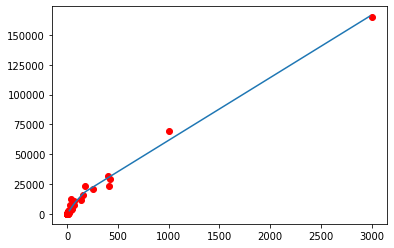

In [34]:
print(listeResultats)

import matplotlib.pyplot as plt
import numpy as np


plt.plot(range(20,3000,20),listeResultats)
plt.scatter(loi_kleiber_data['Masse'], loi_kleiber_data['Metabolisme'], color='red')
plt.show()
